In [1]:
# Import libraries.
using Turing, StatsPlots, Random, Memoization

In [27]:
N = 10000
INFALG = IS()
PRIOR_POLICY = [1,1,1]
PDIRAC = 0.98

0.98

In [93]:
@model function agent(is_odd_player, opponent_chn, opponent_history, depth = 1)
    beta_opp ~ Beta(1, 1) #prior
    if depth == 0
        for i in 1:length(opponent_history)
            opponent_history[i] ~ Bernoulli(beta_opp) # observe
        end
        next_opp_move ~ Bernoulli(beta_opp) # sample
    end
    if depth > 0
        weights = exp.(opponent_chn[:lp][:, 1])
        idx ~ Categorical(weights/sum(weights))
        opp_move_sample = opponent_chn[:my_move][idx, 1]
        opp_move_sample = convert(Bool,opp_move_sample)
        next_opp_move ~ Bernoulli(opp_move_sample ? PDIRAC : 1 - PDIRAC) # observe
    end
    if is_odd_player
        winning_move = 1 - next_opp_move
    else
        winning_move = next_opp_move
    end
    winning_move = convert(Bool,winning_move)
    my_move ~ Bernoulli(winning_move ? PDIRAC : 1 - PDIRAC) # Dirac(my_move)
end

agent (generic function with 3 methods)

the infece is about the opponent model and not my model

In [77]:
# Plot the results
function plotChn(chn)
    histogram(chn[:my_move], weights=exp.(chn[:lp]), normalize=:probability)
end

plotChn (generic function with 1 method)

In [89]:
function run_two_agents_theory_of_mind(odd_player_prespective, first_model, second_model, first_player_history, second_player_history ,depth)
    second_chn_i = []
    first_chn_i = []
    for i in 0:depth
        first_chn_i = sample(first_model(!odd_player_prespective, second_chn_i, second_player_history, i),  INFALG, N)
        second_chn_i = sample(second_model(odd_player_prespective, first_chn_i, first_player_history, i), INFALG, N)
    end
    plotChn(second_chn_i)
end

run_two_agents_theory_of_mind (generic function with 2 methods)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


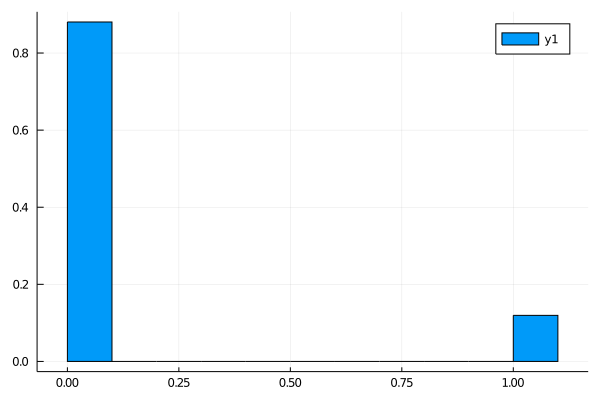

In [90]:
run_two_agents_theory_of_mind(true, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 0)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


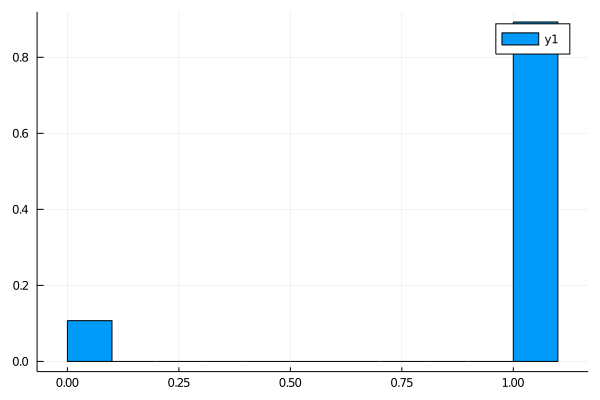

In [91]:
run_two_agents_theory_of_mind(false, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 0)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04


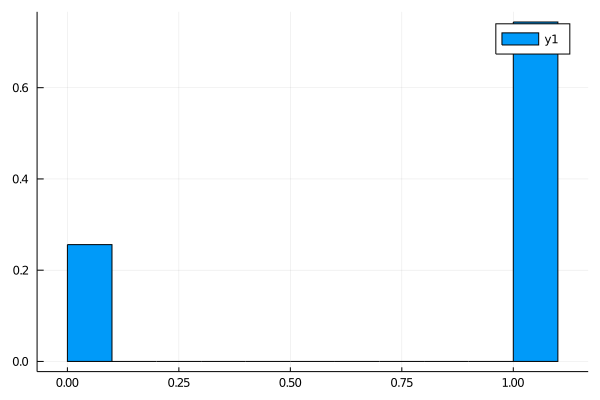

In [95]:
run_two_agents_theory_of_mind(true, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 3)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04


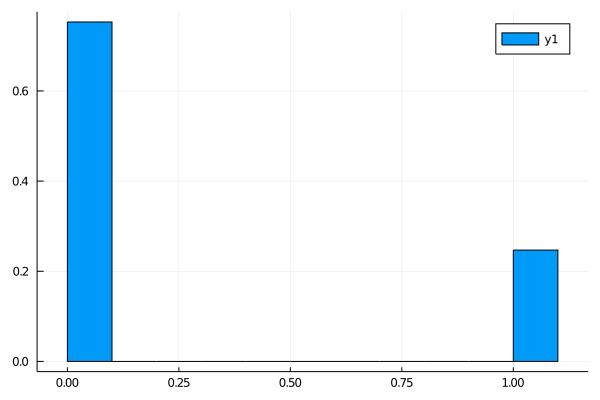

In [96]:
run_two_agents_theory_of_mind(false, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 3)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 

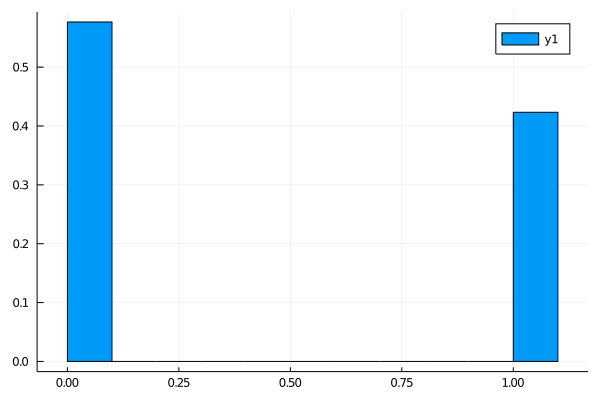

In [97]:
run_two_agents_theory_of_mind(true, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 10)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:03
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 

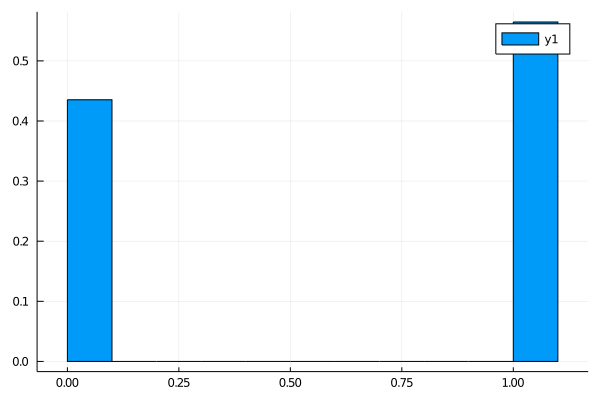

In [98]:
run_two_agents_theory_of_mind(false, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 10)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 

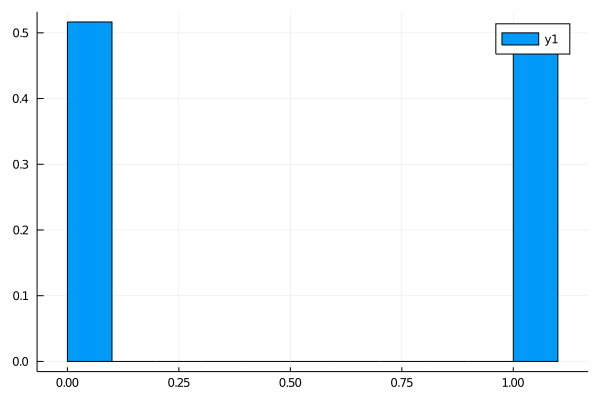

In [99]:
run_two_agents_theory_of_mind(true, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 20)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 

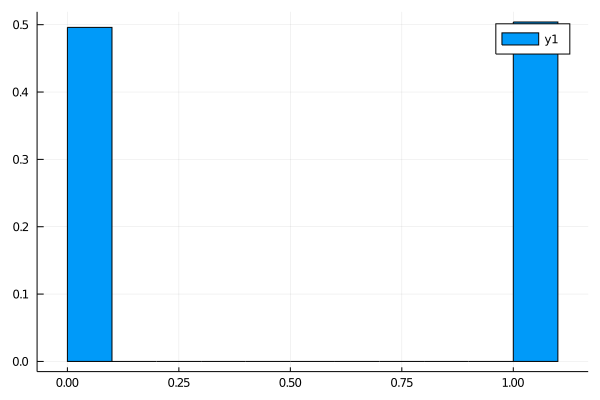

In [100]:
run_two_agents_theory_of_mind(false, agent, agent, [1,1,1,1,1,1,1,1,1,1] , [0,0,0,0,0,0,0,0,0,0], 20)